# An Introduction to Neural Networks in PyTorch

## Overview
Neural networks are like magical boxes, able to tackle any task you have at hand. Recently, neural networks have been applied to the problems of [real time object recognition for autonomous vehicles](https://eng.uber.com/sbnet/), [visualization of photographs in different artistic styles](https://towardsdatascience.com/artistic-style-transfer-b7566a216431), the creation of [new names for ice cream flavors](http://aiweirdness.com/post/173797162852/ai-scream-for-ice-cream), and even the [generation of fake news](http://www.businessinsider.com/researchers-teach-ai-neural-network-write-fake-reviews-fake-news-2017-8). 

![style-transfer](images/style-transfer.png)

_Example of cat visualized in the style of a painting, courtesy of [http://kvfrans.com/](http://kvfrans.com/neural-style-explained/)_.

It is clear to see that neural networks can be used in a wide variety of domains – the possibilities are endless! Such applications of neural networks have been made possible by previous advances in neural learning, computation hardware, and novel neural network architectures published by academics in the field of deep learning. We will explore neural networks by examining the intuition behind the architecture of the neural network and how the network learns from training examples. After some of the basics have been explained, we’ll make our very own neural network for classifying handwritten digits.

## What is a neural network
A [basic neural network](http://neuralnetworksanddeeplearning.com/chap1.html) is commonly visualized as a system of layered nodes. Nodes are connected forward to their successive layer with weights, which scale the values from one node to the next. The scaled values are then added together, and then passed through an activation function to introduce nonlinearity into the system. We do this to allow the network to learn nonlinear relations of the training data. This representation is analogous to the neural connections of a brain – hence the name, neural network. The weights between the nodes of the network correspond to the synapses connecting neurons, and the activation function associated with a node is akin to a threshold needed for the neuron to fire off its action potential to signal other neurons.

![A basic 3-layer neural network](images/basic-nn.png)
_A basic 3-layer neural network, courtesy of [http://texexample.net](http://www.texample.net/tikz/examples/neural-network/) ._

### Fully Connected Layers
In the example above, we see a neural network with three layers. The first layer, the input layer, connects to the intermediate hidden layer, which is connected to the final layer, known as the output layer. The input is fed into the first layer, and then the calculations are applied onto this input to generate the input for the next layer, and this is repeated until we reach the final layer. Since every node in the hidden layer is connected to all activations in the previous layer, we call this type of layer “fully connected” or a dense layer. 

For training examples to be fed into this network’s first layer, they must first be represented in vector form. One example is an image, which is inherently represented as pixels with numeric intensities. To pass this image into the neural network, we can condense it (with width $w$ and height $h$) into a vector of column vector of values of size $wh$. Now, the input layer of the neural network can have a $wh$ input nodes to take in the image.

![MNIST-fc-nn](images/MNIST-fc.png)
_Vectorization of a handwritten digit, courtesy of https://ml4a.github.io/ ._

We'll examine a toy neural network to tackle the problem of classifiying handwritten digits, first pioneered by Yann LeCun (now director of AI at Facebook Research) [in the late 1990s](http://yann.lecun.com/exdb/publis/pdf/lecun-01a.pdf).
Here, we have $28\times28$ sized image representing a handwritten digit. To feed it into our network, we take all the pixels (in this case, $28*28 = 784$) and create an input layer with $784$ nodes. The input layer is fully connected to a hidden layer of $10$ nodes, and then the hidden layer is fully connected to an output layer of $10$ nodes. The output layer of $10$ nodes will generate probabilities for whether the image is the digit $0, 1, \dots 9$. We assign a label to the image based on the maximum of the probabilities.

### Convolutional Layers

#### The Convolution Operator
In addition to fully connected layers, we can also have connections in our neural network that function as [convolutions of the the input](http://yann.lecun.com/exdb/publis/pdf/lecun-bengio-95a.pdf). 

![convolution](images/conv.png)

_A convolution operation, courtesy of [http://cambridgespark.com](http://cambridgespark.com/content/tutorials/convolutional-neural-networks-with-keras/figures/convolve.png)._

In the figure above, we have a matrix $I$ and convolution operator $K$ (also known as a kernel). To achieve convolution, we slide the kernel over the image $I$, and take the weighted sum of the elements of the window in $I$ covered by $K$, using the weight from the corresponding element in $K$. This will generate the output for the convolved image.

The kernel, shown in blue, is currently slid over a portion of the image $I$, shown in red. To generate the corresponding output in $I \ast K$, shown in green, we take the weighted sum: $1*1 + 0*0 + 0*1 + 1*0 + 1*1 + 0*0 + 1*1 + 1*0 + 1*1 = 4$.

So, if we're working with images, we won't need to vectorize them! We can simply apply a convolution operation over the image, and then use the resulting convolution as the input for our next layer. Also, a convolutional layer can have multiple convolutions to generate new feature maps for the next layer. 

The purpose of using a convolutional layer is to effectively represent the input of multidimensional images better. Rather than vectorizing the image for a fully connected layer, it is more natural to keep the image in its original representation, and use a convolution instead. This greatly reduces the number of trainable parameters needed for the neural network. Also, this resembles the visual cortex of the brain, where neurons have receptive fields of the visual field - the overlap of all the receptive fields encompasses the visual field, and allows us to process visual information. Similarly, in the convolution operation, the receptive field of a neuron is each sliding of the convolution kernel across the image.

## How does a Neural Network Learn?
Now, we have an understanding for the basic architecture of a neural network. Essentially, the power of neural networks stems from its ability to gradually learn a task, if given abundant training examples. Through the intricate operations of the network, key features are learned from the training examples so the network can learn to classify new examples that are passed into the network. But how does the network “learn”? 

Through the work of Rumelhart on [neural learning](https://www.nature.com/articles/323533a0.pdf), he and his collaborators were able to discover the idea of backpropogation (also known as backprop). On a high level, backprop adjusts the weights, or the connections between nodes of the neural network, in such a way that the error of the neural network is decreased at each iteration of backprop. Combined with a technique called [gradient descent](https://en.wikipedia.org/wiki/Gradient_descent), we can iteratively adjust the weights to fine-tune the weights of our neural network. The mathematical derivation of backpropogation applied to a three-layer network, as well as the final adjustment of weights through gradient descent is covered in the appendix.

Our neural network can learn by applying backprop and gradient descent optimization on our training dataset multiple times. The number of times we use the training set to train our neural network is denoted as the number of epochs of training.  

## Recent advances of the field

### ReLu Activation Function

The choice of activation function to use in our neural network is an important topic. We use the activation function to introduce nonlinearity into the system, so our network can learn nonlinear relations of the dataset we are training it on. The choice of activation function is important as it affects how the neural network learns. As shown in the appendix, the derivative of this activation function is taken into account when updating the weights of the network. 

![sigmoid and tanh](images/activation-funcs.jpeg)
_Graphical representation of sigmoid and tanh activation functions, courtesy of [https://towardsdatascience.com](https://towardsdatascience.com/activation-functions-neural-networks-1cbd9f8d91d6)._

The problem with the $sigmoid$ and $tanh$ functions is that their derivatives approaches $0$ once their inputs are out of the range $\text{[}-2, 2\text{]}$. This is a problem, since then the amount of change that we apply to our weights through backprop and gradient descent will also go to 0. Essentially, our network will still learn, but very slowly. 

To alleviate this, [Rectified Linear Units (ReLU)](http://www.cs.toronto.edu/~fritz/absps/reluICML.pdf) were created! ReLu is a nonlinear function that has a derivative of 1 when its input is positive, and 0 if its input is negative. Now, our function has a broader domain, [$0, \infty$], where it has a nonzero derivative that does not vanish. 

![ReLu](images/ReLu.png)

_Graphical representation of ReLU activation function, courtesy of [https://quora.com](https://qph.fs.quoracdn.net/main-qimg-4229dd280e03b7b3a5dc26c808c4b15b)._

### Dropout

When training the network, the goal is to have a network that can generalize - that is, the network works well on both the data you are training it on, as well as data it might encounter in the future. Commonly, networks achieve high accuracy on training data, but not the test data - this is known as overfitting. 

We can tackle this problem through a method called [dropout](http://jmlr.org/papers/volume15/srivastava14a.old/srivastava14a.pdf). Essentially, during training, we remove some proportion of neurons where the dropout layer is located, and prevent the selected neurons from learning. Intuitively, the remaining neurons in the layer are forced to have more robust weights for the neural network to have high accuracy. This helps hinder the event of overfitting while training the network. Dropout layers are frequently used in conjunction with fully connected layers, rather than convolutional layers are already somewhat resistant to overfitting since they have less trainable parameters compared to fully connected layers.

## Classification using a Neural Network Using PyTorch
Using what we've learned so far, we'll use a neural network (specifically [LeCun's LeNet-5](http://yann.lecun.com/exdb/publis/pdf/lecun-01a.pdf)), to classify handwritten digits. We'll use the [PyTorch](https://pytorch.org/) library to create our neural network!

### Architecture of LeNet-5
The architecture is as follows: ![title](images/LeNet-arch.png)

We start start off with $32 \times 32$ images (we pad the $28 \times 28$ initial images to achieve this). Here are the layers we will implement:

Layers   | Result        
:--------|-------------:
C1       | (6@28x28)     
S2       | (6@14x14)      
C3       | (16@10x10)
S4       | (16@5x5)
C5       | (120@1x1)
F6       | (84x1)
OUTPUT   | (10x1)

$C1, C3, C5$ are convolutional layers with kernel size $5 \times 5$, as used in the paper. $S2$ and $S4$ are subsampling layers. In LeNet, the subsampling layers actually have trainable weights, but in this implementation, we make a simplifying assumption and use maxpooling instead. The last layer $F6$ is fully connected, with softmax used at the end to get probability scores for each of the 10 classes. We also make another simplifying assumption in layer $C3$ by training the convolution layer on all feature maps available, rather than the feature map split used in the paper.

We use the ReLU ($y = \max(0,x)$) activiation function instead of $tanh$, as ReLU suffers less from the vanishing gradient problem, allowing networks that use ReLU to be more easily trained.

Finally, we introduce a dropout layer after the fully connected layers to prevent overfitting of the data, preventing neurons of the same layer from depending on each other during learning.

In [20]:
import torch 
import torch.nn as nn
import torchvision.datasets as dsets
import torchvision.transforms as transforms
from torch.autograd import Variable

class LeNet5(nn.Module):
    def __init__(self):
        super(LeNet5, self).__init__()
        self.conv1 = nn.Sequential(
            nn.Conv2d(1, 6, kernel_size=(5,5), padding=2),
            nn.MaxPool2d(kernel_size=(2, 2), stride=2),
            nn.ReLU()
        )
        self.conv2 = nn.Sequential(
            nn.Conv2d(6, 16, kernel_size=(5, 5)),
            nn.MaxPool2d(kernel_size=(2, 2), stride=2),
            nn.ReLU()
        )
        self.conv3 = nn.Sequential(
            nn.Conv2d(16, 120, kernel_size=(5,5)),
            nn.ReLU()
        )
        self.out = nn.Sequential(
            nn.Linear(120, 84),
            nn.Dropout(),
            nn.ReLU(),
            nn.Linear(84, 10),
            nn.Dropout(),
            nn.ReLU(),
            nn.Softmax(dim=0)
        )
        
    def forward(self, x):
        x = self.conv1(x)
        x = self.conv2(x)
        x = self.conv3(x)
        x = x.view(x.size(0), -1)
        output = self.out(x)
        return output

We define the layers of the network in `__init__` for convenience, so we can reference them later. In the `forward` definition, here we define the forward pass of network, to go from input to output. We pass the input `x` successively through each of the layers. Before the output layer, we flatten the dimension of x to be passed into the final layer with the sets of fully connected weights.

Finally, since we are looking to see which digit class the input belongs to, we use a softmax output layer to output the posterior probabilities that the input is of some digit class.

In [21]:
LeNet = LeNet5()

### Training the network

We specify the hyperparameters of the network below. We use 20 epochs of training (i.e. we train our network on 20 passes of our training data, using batches of 100 training samples when updating the weights of the network). 

The learning rate is small (0.001) as we don't want incredible fluctuations in the weights of our network, as this may cause fluctuations in the error rate in classification as well. Intuitively, this small learning rate will let our network gradually descend to the optimal weights for classification.

PyTorch's built-in automatic differentiation so that backpropogation is already taken care for us, if we handle our inputs/outputs as PyTorch `Variable`'s.

We'll also use a cross entropy loss function (instead of sum of square errors), as well as the ADAM method of stochastic optimization, rather than plain gradient descent to optimize the weights during training.

For convenience, we use PyTorch's built in MNIST dataset to format the data for us for easy enumeration and input into the network for training. We have a dataset set aside for training our network, and we can see the accuracy of our network on new, unused samples in the test dataset. We validate the accuracy on this test dataset to ensure that our network has generalized, by accurately classifying samples it has not seen before. 

In [22]:
num_epochs = 20
batch_size = 100
learning_rate = 0.001

trans = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.1307,), (0.3081,))])
train_dataset = dsets.MNIST(root='./data/', train=True, transform=trans, download=True)
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=batch_size, 
                                           shuffle=True)

test_dataset = dsets.MNIST(root='./data/', train=False, transform=trans)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size, 
                                          shuffle=False)

In [23]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(LeNet.parameters(), lr=learning_rate)

test_acc  = [0]*num_epochs
train_acc = [0]*num_epochs
for epoch in range(num_epochs):
    LeNet.train()
    for i, (images, labels) in enumerate(train_loader):
        images = Variable(images)
        labels = Variable(labels)
        
        optimizer.zero_grad()
        outputs = LeNet(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        if (i+1) % 100 == 0:
            print('Epoch [{}/{}], Iter [{}/{}] Loss: {:.4f}' 
                   .format(epoch+1, num_epochs, i+1, len(train_dataset)//batch_size, loss.data[0]))
    
    LeNet.eval()
    train_correct = 0
    train_total = 0
    for images, labels in train_loader:
        images = Variable(images)
        outputs = LeNet(images)
        _, predicted = torch.max(outputs.data, 1)
        train_total += labels.size(0)
        train_correct += (predicted == labels).sum()
    print('Training Accuracy of the model on the 60000 train images: {}%'.format(100 * train_correct / train_total))
    
    test_correct = 0
    test_total = 0
    for images, labels in test_loader:
        images = Variable(images)
        outputs = LeNet(images)
        _, predicted = torch.max(outputs.data, 1)
        test_total += labels.size(0)
        test_correct += (predicted == labels).sum()

    print('Test Accuracy of the model on the 10000 test images: {}%'.format(100 * test_correct / test_total))
    
    train_acc[epoch] = 100 * train_correct / train_total
    test_acc[epoch] = 100 * test_correct / test_total

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:20: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number


Epoch [1/20], Iter [100/600] Loss: 2.2618
Epoch [1/20], Iter [200/600] Loss: 2.2435
Epoch [1/20], Iter [300/600] Loss: 2.2348
Epoch [1/20], Iter [400/600] Loss: 2.2435
Epoch [1/20], Iter [500/600] Loss: 2.2350
Epoch [1/20], Iter [600/600] Loss: 2.2280
Training Accuracy of the model on the 60000 train images: 62%
Test Accuracy of the model on the 10000 test images: 67%
Epoch [2/20], Iter [100/600] Loss: 2.2282
Epoch [2/20], Iter [200/600] Loss: 2.2277
Epoch [2/20], Iter [300/600] Loss: 2.2255
Epoch [2/20], Iter [400/600] Loss: 2.2276
Epoch [2/20], Iter [500/600] Loss: 2.2259
Epoch [2/20], Iter [600/600] Loss: 2.2264
Training Accuracy of the model on the 60000 train images: 60%
Test Accuracy of the model on the 10000 test images: 65%
Epoch [3/20], Iter [100/600] Loss: 2.2257
Epoch [3/20], Iter [200/600] Loss: 2.2264
Epoch [3/20], Iter [300/600] Loss: 2.2283
Epoch [3/20], Iter [400/600] Loss: 2.2352
Epoch [3/20], Iter [500/600] Loss: 2.2262
Epoch [3/20], Iter [600/600] Loss: 2.2263
Traini

Here, we plot the accuracy as we train our neural network, as well as the accuracy of running our network on the dataset set aside for testing.

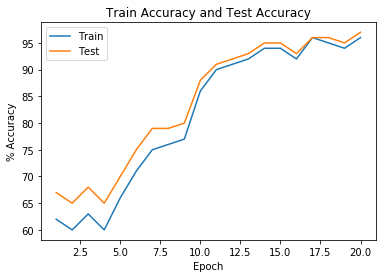

In [24]:
import matplotlib.pyplot as plt

x = range(1,num_epochs+1)
plt.plot(x, train_acc)
plt.plot(x, test_acc)
plt.title('Train Accuracy and Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('% Accuracy')
plt.legend(['Train', 'Test'])
plt.show()

We achieve 97 to 98% accuracy on the test data after 20 epochs. As the network trains, the accuracy increases to this saturation point by the end of training. In the plot below, we show how the network learns over time, with the training accuracy and the test accuracy (of the classification of the training and test datasets, respectively), increase with every iteration of training. Training slows down at around epoch 15.

We've succesively created a neural network to classify handwritten digits!

## Suggested Readings

1. **Automatic differentiation in PyTorch.** Paszke, A., Gross, S., & Lerer, A. (2017). 
2. **Dropout: a simple way to prevent neural networks from overfitting.** Srivastava, N., Hinton, G.E., Krizhevsky, A., Sutskever, I., & Salakhutdinov, R. (2014).
3. **Gradient-based Learning Applied to Document Recognition.** LeCun, Y. (1998).
4. **ImageNet Classification with Deep Convolutional Neural Networks.** Krizhevsky, A., Sutskever, I., & Hinton, G.E. (2012).
5. **Learning representations by backpropagating errors.** Rumelhart, D.E., Hinton, G.E., & Williams, R.J. (1986).
6. **Pattern classification.** Richard O. Duda and Peter E. Hart and David G. Stork. (2001).
7. **Rectified Linear Units Improve Restricted Boltzmann Machines.** Vinod Nair and Geoffrey E. Hinton. (2010).

## Appendix

### Derivation of Backpropogation (simple 3-layer case)
Here, we use a simple cost function, sum of squared errors, and assume that the neural network is 3-layers for simplicity. 

#### Definitions
Define 

\begin{align*}
x_1, x_2, \dots x_n  && \text{inputs to the neural network} \\ 
w_{ji} && \text{weight from input node $i$ to hidden node $j$} \\
net_j && \text{the sum of weighted inputs of input layer to node } j \\
y_j && \text{the output of node $j$ after activation function $f_j$} \\
w_{kj} && \text{the weight from hidden node $j$ to output node $k$} \\
net_k && \text{the sum of weighted activations of hidden layer to node } k \\
z_k && \text{the output of node k after activation function f_k} \\
\eta && \text{learning rate for gradient descent}
\end{align*}

#### Cost Function
We define a cost function $$J(z) = \frac{1}{2} \sum\limits_{k=1}^{n}(t_k - z_k)^2$$ known as the sum of squared errors. $t_k$ is our target value, and $z_k$ is the value generated by the neural network. Intuitively, the cost function outputs a low value if the neural network generates a value close to the target input, and a high value if not.

#### Updating weights from hidden to output layer
We seek to find $$\frac{\partial{J}}{\partial{w_{kj}}}$$

We use the chain rule of calculus and then take the resulting derivatives of the intermediate variables.

\begin{align*}
    \frac{\partial{J}}{\partial{w_{kj}}} &= \frac{\partial{J}}{\partial{z_k}}\frac{\partial{z_k}}{\partial{net_k}}\frac{\partial{net_k}}{\partial{w_{kj}}} & \text{by chain rule} \\
    &= (t_k - z_k)f_k'(net_k)y_j \\
\end{align*}

Now, we can use this for gradient descent. The new weight, $w_{kj}'$, after gradient descent is:

\begin{align*}
w_{kj}' &= w_{kj} - \eta\frac{\partial{J}}{\partial{w_{kj}}} \\ 
&= w_{kj} - \eta(t_k - z_k)f_k'(net_k)y_j \\ 
\end{align*}

#### Updating weights from input to hidden layer
We seek to find $$\frac{\partial{J}}{\partial{w_{ji}}}$$

Again we use the chain rule and then take the resulting derivatives of the intermediate variables.

$$\frac{\partial{J}}{\partial{w_{ji}}} = \frac{\partial{J}}{\partial{y_j}}\frac{\partial{y_j}}{\partial{net_j}}\frac{\partial{net_j}}{\partial{w_{ji}}}$$


We derive first $\frac{\partial{J}}{\partial{y_j}}$.

\begin{align*}
    \frac{\partial{J}}{\partial{y_j}} &= \frac{\partial}{\partial{y_j}} \frac{1}{2}\sum\limits_{k=1}^{n} (t_k - z_k)^{2} & \text{by definition}\\
    &=  \sum\limits_{k=1}^{n} (t_k - z_k) \frac{\partial{z_k}}{\partial{y_j}} & \text{by chain rule} \\ 
    &=  \sum\limits_{k=1}^{n} (t_k - z_k) \frac{\partial{z_k}}{\partial{net_k}}\frac{\partial{net_k}}{\partial{y_j}} & \text{by chain rule} \\
    &=  \sum\limits_{k=1}^{n} (t_k - z_k) f_k'(net_k)w_{kj}
\end{align*}

Putting it all together, we have:

\begin{align*}
\frac{\partial{J}}{\partial{w_{ji}}} &= \frac{\partial{J}}{\partial{y_j}}\frac{\partial{y_j}}{\partial{net_j}}\frac{\partial{net_j}}{\partial{w_{ji}}} \\
&= \big{(}\sum\limits_{k=1}^{n} (t_k - z_k) f_k'(net_k)w_{kj}\big{)}f_j'(net_j)x_i
\end{align*}

The new weight, $w_{ji}'$, after gradient descent is:

\begin{align*}
w_{ji} &= w_{ji} - \eta\frac{\partial{J}}{\partial{w_{ji}}} \\ 
&= w_{ji} - \eta\big{(}\sum\limits_{k=1}^{n} (t_k - z_k) f_k'(net_k)w_{kj}\big{)}f_j'(net_j)x_i \\ 
\end{align*}
